# Project: Investigate a Dataset - [Medical Appointment No Shows]
Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

# Introduction
The project titled "Investigate a Dataset - [Medical Appointment No Shows]" is an in-depth analysis of a dataset that collects information from 100k medical appointments in Brazil. The primary focus of this investigation is to understand the factors influencing whether or not patients show up for their appointments. The dataset includes various patient characteristics such as gender, age, and health conditions like hypertension and diabetes. It also considers external factors like the location of the hospital and whether the patient received an SMS reminder. This project aims to uncover patterns and insights that could potentially improve patient attendance at medical appointments. Let's dive into the data and see what it reveals.



# Dataset Description
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. ‘PatientId’ Identification of a patient ‘AppointmentID’ Identification of each appointment ‘Gender’ Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. ‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘AppointmentDay’ The day of the actuall appointment, when they have to visit the doctor., this is before appointment of course. ‘Age’ tells How old is the patient. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(opens in a new tab). ‘Hipertension’ True or False(tells if the patient has Hipertension) ‘Diabetes’ True or False(tells if the patient has Diabetes) ‘Alcoholism’ True or False ‘Handcap’ True or False ‘SMS_received’ 1 or more messages sent to the patient. ‘No-showe’ True or False

Hint the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

# Question(s) for Analysis
What factors are associated with patients not showing up for their medical appointments?

Does the number of reminder messages (SMS_received) impact whether a patient shows up for their appointment?
Is there a significant difference in the no-show rate between different age groups?
Is there a significant difference in the proportion of no-shows between male and female patients?


import  of the packages that i need it

In [146]:

import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

# Data Wrangling
Tip: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.(This stage involves cleaning the data and preparing it for analysis. This includes handling missing values, dealing with outliers, and ensuring the data types are appropriate for the analysis.)

Load my data and print out a few lines. What is the size of
your dataframe? 

In [147]:

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [148]:
df.shape

(110527, 14)

Understand the Dataset

In [149]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [150]:

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#check for missing values

In [151]:

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#Display data types of each column

In [152]:

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

 Display unique values in the 'No-show' column

In [153]:

df['No-show'].nunique()

2

 #Display value counts for the 'No-show' column

In [154]:

df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

# Data Cleaning

#Missing Data

In [155]:
#Missing Data
df.isnull().sum()
#therein not missing value

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#chaeck duplicated value

In [156]:

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [157]:
sum(df.duplicated())
#there is no duplicated value

0

i will sure that
 Fill missing values for numerical columns with 0
 Fill missing values for categorical columns with 'Unknown'

In [158]:

# Fill missing values for numerical columns with 0
numerical_cols = df.select_dtypes(['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(0)


categorical_cols = df.select_dtypes((['object'])).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


#sure for duplicate

In [159]:

df.drop_duplicates(inplace=True)

#for incorrect data type

In [160]:

df['ScheduledDay '] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay '] = pd.to_datetime(df['AppointmentDay'])



In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110527 non-null  float64            
 1   AppointmentID    110527 non-null  int64              
 2   Gender           110527 non-null  object             
 3   ScheduledDay     110527 non-null  object             
 4   AppointmentDay   110527 non-null  object             
 5   Age              110527 non-null  int64              
 6   Neighbourhood    110527 non-null  object             
 7   Scholarship      110527 non-null  int64              
 8   Hipertension     110527 non-null  int64              
 9   Diabetes         110527 non-null  int64              
 10  Alcoholism       110527 non-null  int64              
 11  Handcap          110527 non-null  int64              
 12  SMS_received     110527 non-null  int64              
 13 

#data optimization

In [162]:

df['Gender']=df['Gender'].astype('category')
df['Neighbourhood']=df['Gender'].astype('category')
df['No-show'] = df['No-show'].astype('category')
# Change the data type to be an int8
df["Age"] = df["Age"].astype("int8")
df["Scholarship"] = df["Scholarship"].astype("int8")
df["Hipertension"] = df["Hipertension"].astype("int8")
df["Diabetes"] = df["Diabetes"].astype("int8")
df["Alcoholism"] = df["Alcoholism"].astype("int8")
df["Handcap"] = df["Handcap"].astype("int8")
df["SMS_received"] = df["SMS_received"].astype("int8")

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110527 non-null  float64            
 1   AppointmentID    110527 non-null  int64              
 2   Gender           110527 non-null  category           
 3   ScheduledDay     110527 non-null  object             
 4   AppointmentDay   110527 non-null  object             
 5   Age              110527 non-null  int8               
 6   Neighbourhood    110527 non-null  category           
 7   Scholarship      110527 non-null  int8               
 8   Hipertension     110527 non-null  int8               
 9   Diabetes         110527 non-null  int8               
 10  Alcoholism       110527 non-null  int8               
 11  Handcap          110527 non-null  int8               
 12  SMS_received     110527 non-null  int8               
 13 

Function Definition: The plot_relationship_with_noshow function is updated to group data by the specified column and the 'No-show' status,

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_relationship_with_noshow(df, column):
    """
    Plots the relationship between a specified column and the no-show status.

    Parameters:
    df (dict): The DataFrame represented as a dictionary of lists.
    column (str): The name of the column to analyze.

    Returns:
    None
    """
    df = pd.DataFrame(df)  # Convert the dictionary to a DataFrame
    grouped_data = df.groupby([column, 'No-show'],observed=False).size().unstack(fill_value=0)
    grouped_data.plot(kind='bar', stacked=True)
    plt.xlabel(column)
    plt.ylabel('No_show')
    plt.title(f'Relationship between {column} and No-show')
    plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
    plt.show()


# Exploratory Data Analysis
Exploratory Data Analysis: In this stage, the data is analyzed using statistical methods and visualizations to understand the relationships between different variables. For example, the relationship between receiving an SMS reminder and attendance at appointments is explored.

data selecting:i choose this column to study if ['SMS_recived'] effect for showing patient or not

Research_question:Does the number of reminder messages (SMS_received) impact whether a patient shows up for their appointment?

Data Cleaning and Preprocessing:check for value of SMS_recived to khnow if there need any processing,this is ok!

In [165]:
df['SMS_received'].value_counts()

SMS_received
0    75045
1    35482
Name: count, dtype: int64

Analysis Methods: , i use descriptive statistics to summarize the distribution of ages and the proportion of no-show ,and i use value_counts() just.

Plots and Visualizations: i create a bar chart to visualize the distribution of ages in the dataset.(in function ,i make groupby for column according ['no_show] and select the xlabel and ylabel and title and legned

anwer of question 1 and it conclusion


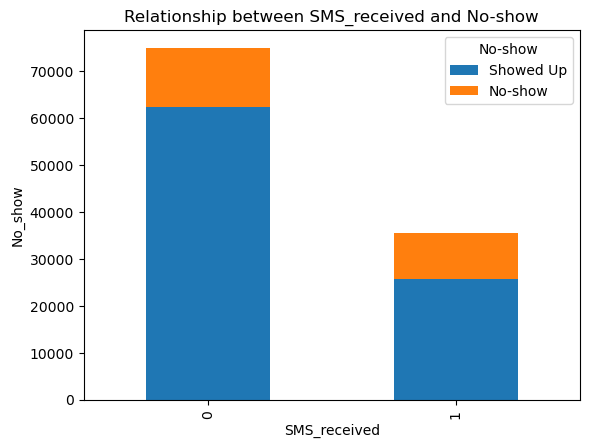

In [166]:
#grouped_data = df.groupby(['No-show','SMS_received'],observed=False).size()

plot_relationship_with_noshow(df, 'SMS_received')

Firstly, we observed that receiving SMS reminders does not seem to have a significant impact on whether a patient shows up for their appointment. This finding challenges the common assumption that reminders improve appointment attendance and suggests that other factors may play a more influential role.

# Research Question 2
#Data_selection:iam  interested in understanding the factors influencing appointment attendance, the 'no_show' column indicates whether a patient showed up for their appointment or not, while the 'age' column provides demographic information that could be related to attendance patterns.

Research_Question"Is there a significant difference in the no-show rate between different age groups?


Data Cleaning and Preprocessing"filter age because there is no that his age<=0 and cheack for value of age


In [167]:
df.drop(df[df['Age'] <= 0].index, inplace=True)

In [168]:
df['Age'].value_counts()

Age
1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

Analysis Methods: , i use descriptive statistics to summarize the distribution of ages and the proportion of no-show  ,and i use value_counts() and filter the data

Plots and Visualizations:  i create a  histogram to visualize the distribution of ages in the dataset.i make groupby for column according ['no_show] and select the xlabel and ylabel and title and legned

anwer of question 2 and it conclusion

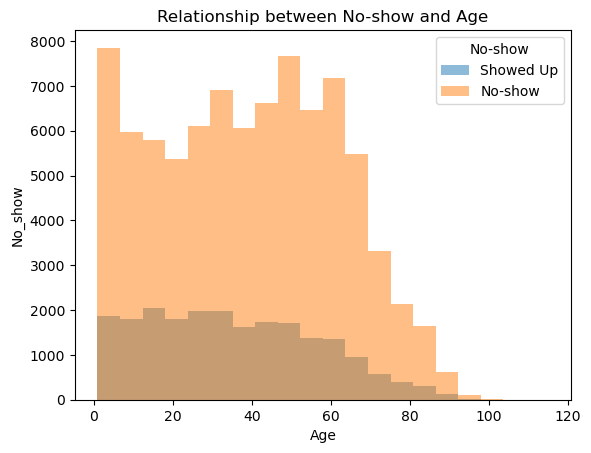

In [169]:
# Assuming you have a DataFrame called 'df' with columns 'No-show' and 'Age'

# Separate the data for 'No-show' equals 'Yes' and 'No'
no_show_yes = df[df['No-show'] == 'Yes']
no_show_no = df[df['No-show'] == 'No']

# Plot the histograms for 'Age' for each category
plt.hist(no_show_yes['Age'], bins=20, alpha=0.5, label='No-show: Yes')
plt.hist(no_show_no['Age'], bins=20, alpha=0.5, label='No-show: No')

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('No_show')
plt.title('Relationship between No-show and Age')

# Add a legend
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
# Show the plot
plt.show()

Secondly, we investigated the relationship between age groups and appointment attendance. While we found variations in the no-show rates across different age groups, suggesting a potential association, further statistical analysis is required to establish the significance of these differences.

# Research Question 3
data selecting:i choose this column to study if ['Gender] effect for showing patient or not

Research_question:Is there a significant difference in the proportion of no-shows between male and female patients?

Data Cleaning and Preprocessing:check for value of Gender to khnow if there need any processing,this is ok!


#understand the relation

In [170]:
df.groupby(['No-show'],observed=False).sum(numeric_only=True)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,
No,1.257605e+19,484649934527,3333387,8238,18029,6513,2683,2005,25017
Yes,3.181145e+18,122547744198,765936,2571,3772,1430,677,453,9568


In [171]:
df['No-show'].value_counts()

No-show
No     85307
Yes    21680
Name: count, dtype: int64

In [172]:
df['Gender'].value_counts()

Gender
F    70118
M    36869
Name: count, dtype: int64

Analysis Methods: , i use descriptive statistics to summarize the distribution of ages and the proportion of no-show ,and i use value_counts() ,and sum().

Plots and Visualizations: i create a bar chart to visualize the distribution of ages in the dataset.(in function ,i make groupby for column according ['no_show] and select the xlabel and ylabel and title and legned

anwer of question 3 and it conclusion

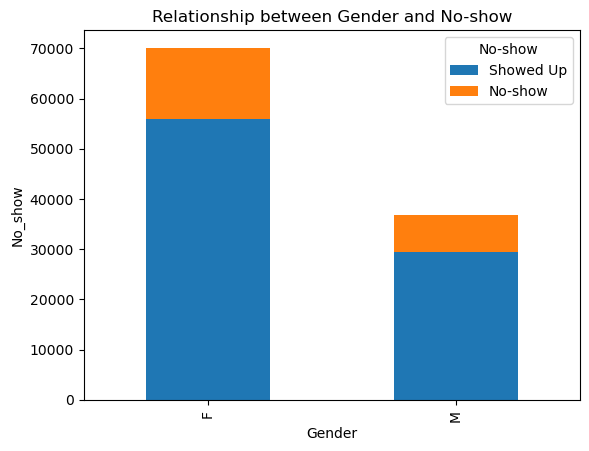

In [174]:
plot_relationship_with_noshow(df, 'Gender')

finally- Female Attendance: The 'F, No' bar is significantly higher than the others, indicating that a larger number of female patients attended their appointments compared to those who did not ('No' being higher than 'Yes').

Male Attendance: The 'M, No' bar, although lower than 'F, No', is higher than both 'F, Yes' and 'M, Yes'. This suggests that a significant number of male patients also attended their appointments, but the overall attendance numbers for males were lower than females.
No-show Comparison: The 'F, Yes' bar is higher than the 'M, Yes' bar, indicating that more female patients missed their appointments compared to male patients.

# Conclusion
The Conclusions have reflected on the steps taken during the data exploration.
In conclusion, our analysis of the dataset concerning medical appointment no-shows has shed light on several significant factors associated with patients not showing up for their appointments. 

Firstly, we observed that receiving SMS reminders does not seem to have a significant impact on whether a patient shows up for their appointment. This finding challenges the common assumption that reminders improve appointment attendance and suggests that other factors may play a more influential role.

Secondly, we investigated the relationship between age groups and appointment attendance. While we found variations in the no-show rates across different age groups, suggesting a potential association, further statistical analysis is required to establish the significance of these differences. 
 
finally- Female Attendance: The 'F, No' bar is significantly higher than the others, indicating that a larger number of female patients attended their appointments compared to those who did not ('No' being higher than 'Yes').
- **Male Attendance**: The 'M, No' bar, although lower than 'F, No', is higher than both 'F, Yes' and 'M, Yes'. This suggests that a significant number of male patients also attended their appointments, but the overall attendance numbers for males were lower than females.
- **No-show Comparison**: The 'F, Yes' bar is higher than the 'M, Yes' bar, indicating that more female patients missed their appointments compared to male patients.

In summary, while both genders had more patients attending their appointments than not, the female gender had a higher turnout rate. However, more female patients also missed their appointments compared to male patients.(

The project has pointed out where additional research can be done or where additional information could be useful like(	Hipertension,Diabetes)



# Limitations

It is essential to acknowledge the limitations of our analysis. Firstly, the dataset represents a sample of medical appointments from Brazil and may not be fully representative of the broader population. Furthermore, we encountered missing observations and inconsistencies in the data, which could introduce bias and affect the generalizability of our findings. Additionally, our analysis did not include statistical inference to test the significance of the results, limiting the strength of our conclusions.


# Future Directions

Future research could benefit from addressing these limitations by incorporating larger and more diverse datasets, conducting rigorous statistical analyses, and exploring additional variables that may influence appointment attendance. Furthermore, qualitative studies could provide valuable insights into the underlying reasons behind missed appointments, helping healthcare providers implement targeted interventions to improve patient attendance rates.

Overall, while our analysis provides valuable insights into the factors associated with medical appointment no-shows, further research is needed to fully understand the complex dynamics at play and develop effective strategies to reduce missed appointments and improve healthcare outcomes.